<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/image_classification_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adding needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#--> Adding needed libraries and loading data which is CIFAR10 dataset tht contains 10 classes of images including cars, horses, trucks and etc.
#--> We have used tensorflow in order to create the neural network and used its capabilities in training the neural network for CNN architecture

In [2]:
 # Library for plotting the images and the loss function
import matplotlib.pyplot as plt

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 50s 0us/step


#--> Plotting classed and a sample image to understand the input data

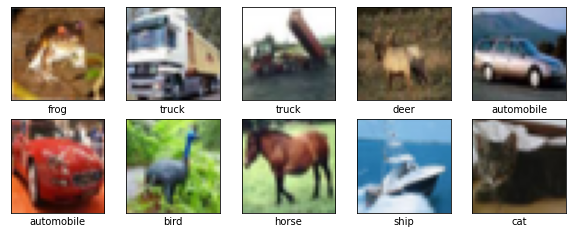

In [3]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#--> Building a sequential as model to creat the CNN architecture which is built of as below :

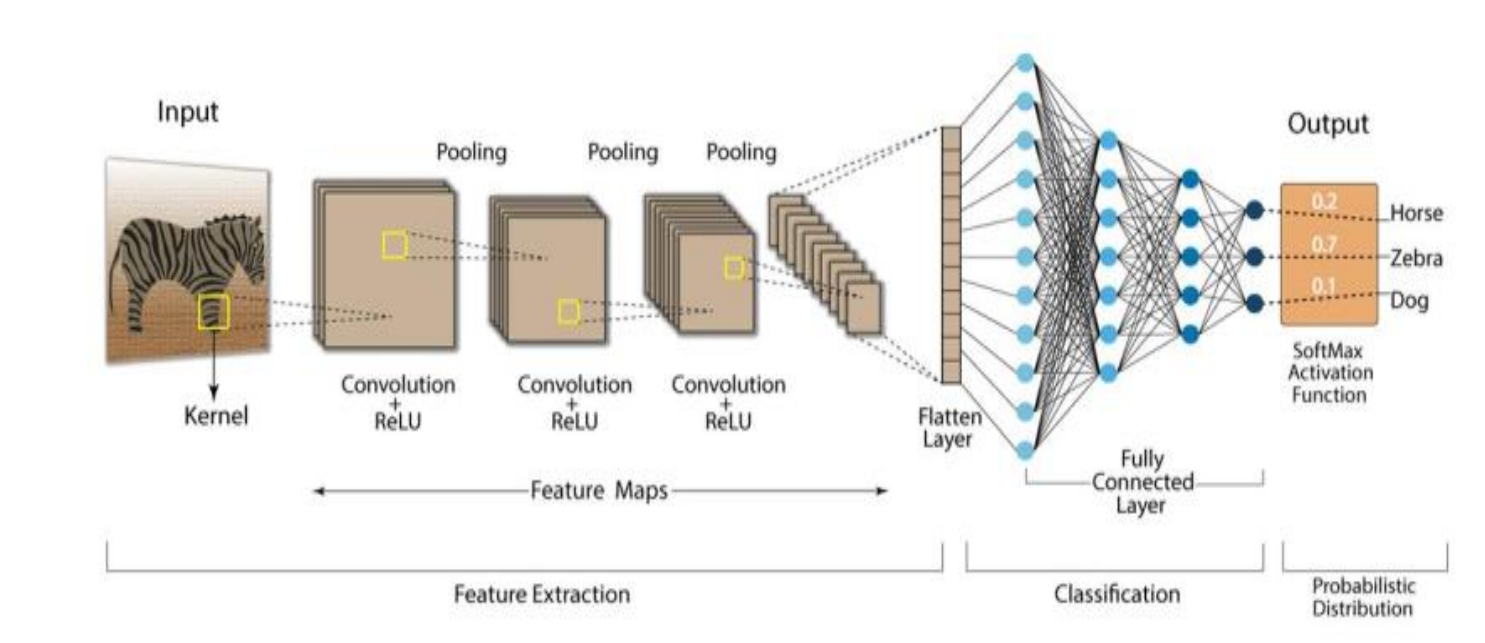





In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#--> Adding flatten layer and fully connected layer
#--> Finally adding SoftMax layer to the model
#--> Printing summery of model

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

#--> Learining with 5 epochs

In [ ]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1175 - accuracy: 0.3326 - val_loss: 2.0445 - val_accuracy: 0.4080
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0190 - accuracy: 0.4371 - val_loss: 1.9877 - val_accuracy: 0.4668
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9633 - accuracy: 0.4948 - val_loss: 1.9540 - val_accuracy: 0.5037
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9304 - accuracy: 0.5277 - val_loss: 1.9581 - val_accuracy: 0.4974
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9086 - accuracy: 0.5507 - val_loss: 1.9255 - val_accuracy: 0.5320


#--> Plotting accuracy and val_accuracy for 5 epochs

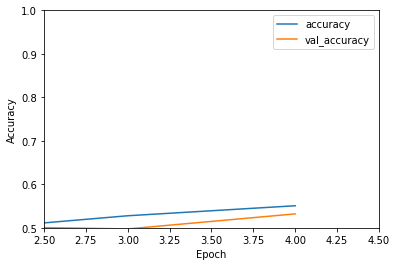

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([2.5, 4.5])
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

#--> Learining with 10 epochs

In [ ]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1113 - accuracy: 0.3415 - val_loss: 2.0580 - val_accuracy: 0.3923
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9962 - accuracy: 0.4598 - val_loss: 1.9627 - val_accuracy: 0.4947
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9487 - accuracy: 0.5097 - val_loss: 1.9366 - val_accuracy: 0.5236
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9162 - accuracy: 0.5423 - val_loss: 1.9147 - val_accuracy: 0.5426
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8915 - accuracy: 0.5667 - val_loss: 1.8893 - val_accuracy: 0.5691
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8754 - accuracy: 0.5830 - val_loss: 1.8787 - val_accuracy: 0.5802
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8598 - accuracy: 0.6004 - val_loss: 1.8888 - val_accuracy:

#--> Plotting accuracy and val_accuracy for 10 epochs

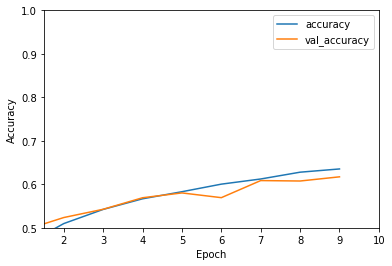

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([1.5, 10])
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

#--> Learining with 15 epochs

In [6]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 16s 5ms/step - loss: 2.1110 - accuracy: 0.3417 - val_loss: 2.0550 - val_accuracy: 0.4016
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0021 - accuracy: 0.4553 - val_loss: 1.9751 - val_accuracy: 0.4814
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9498 - accuracy: 0.5090 - val_loss: 1.9438 - val_accuracy: 0.5095
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9190 - accuracy: 0.5398 - val_loss: 1.9184 - val_accuracy: 0.5374
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8889 - accuracy: 0.5702 - val_loss: 1.9234 - val_accuracy: 0.5356
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8711 - accuracy: 0.5877 - val_loss: 1.8821 - val_accuracy: 0.5764
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8569 - accuracy: 0.6016 - val_loss: 1.8764 - val_a

#--> Plotting accuracy and val_accuracy for 100 epochs

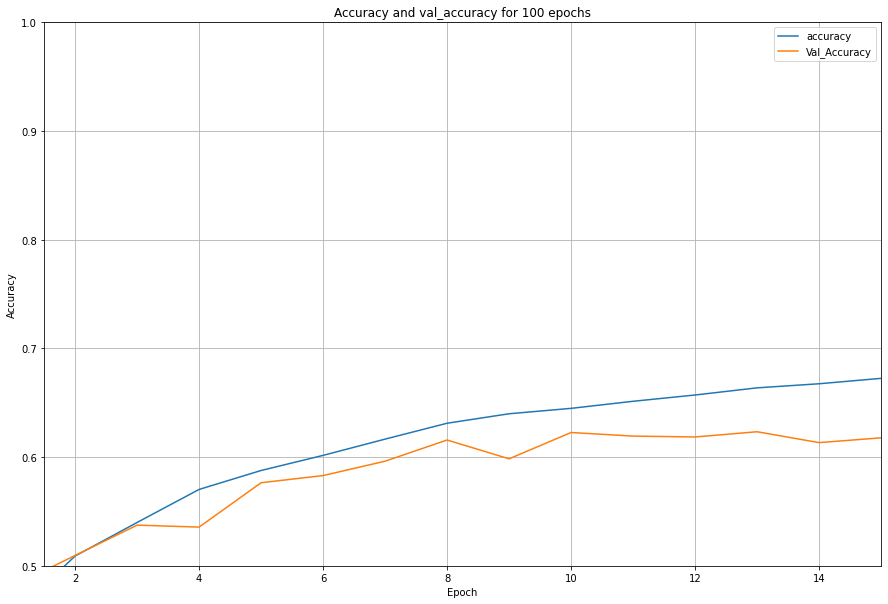

In [11]:
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([1.5, 15])
plt.ylim([0.5, 1])
plt.legend(loc='upper right')
plt.title("Accuracy and val_accuracy for 100 epochs")
plt.grid()

In [12]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


313/313 [==============================] - 1s 2ms/step


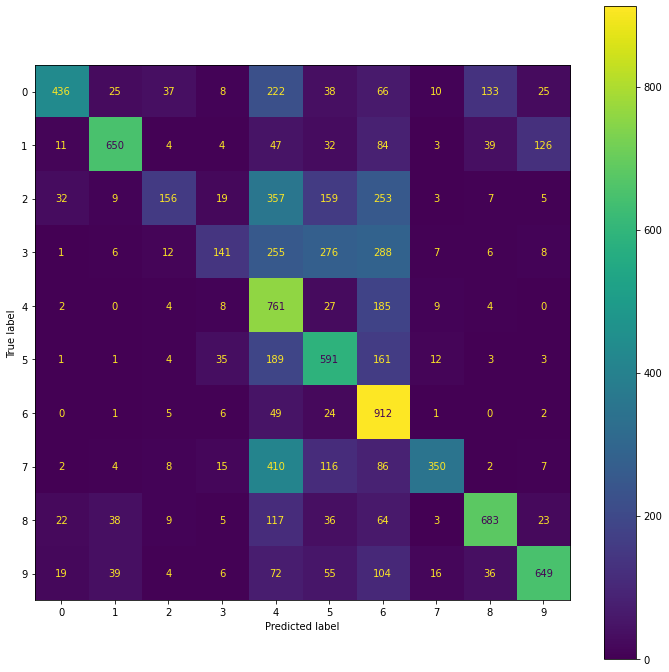

In [24]:
from sklearn.metrics import plot_confusion_matrix

figsize = (12,12)
#ax=plt.subplots(figsize=figsize)[1]
plot_confusion_matrix(classifier, test_images, test_labels, ax=plt.subplots(figsize=figsize)[1])


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


313/313 [==============================] - 1s 3ms/step


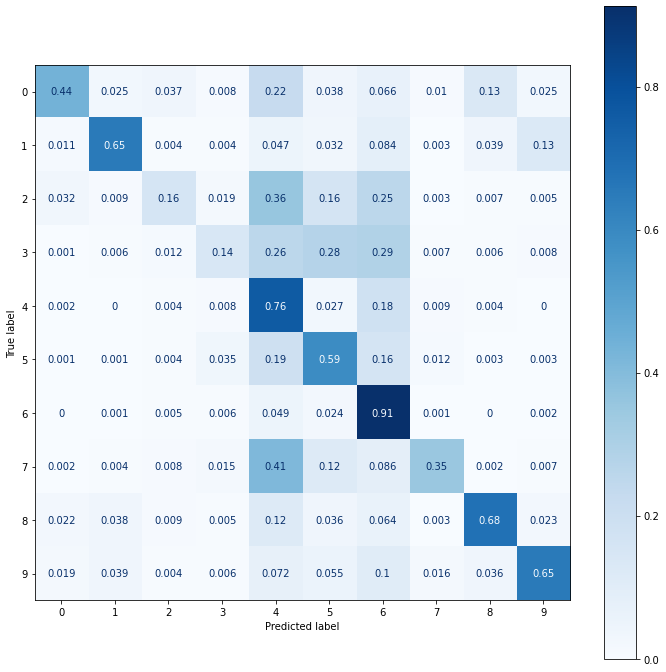

In [22]:
figsize = (12,12)

plot_confusion_matrix(estimator=classifier, X=test_images, y_true=test_labels, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])